# Explainable AI : XAI library
Reference: https://github.com/EthicalML/xai

In [1]:
!pip install xai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 5.0 MB/s 
     |████████████████████████████████| 11.3 MB 45.7 MB/s 
     |████████████████████████████████| 23.1 MB 63.0 MB/s 
     |████████████████████████████████| 15.7 MB 18.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0

In [1]:
import xai.data
df = xai.data.load_census()
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,ethnicity,gender,capital-gain,capital-loss,hours-per-week,loan
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [3]:
df.shape

(32561, 13)

       'relationship', 'ethnicity', 'gender', 'loan'],
      dtype='object'). If you see an error these are not correct, please provide them as a string array as: categorical_cols=['col1', 'col2', ...]


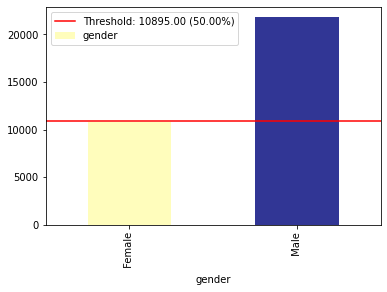

In [2]:
# Show imbalance for gender column
ims = xai.imbalance_plot(df, "gender")

       'relationship', 'ethnicity', 'gender', 'loan'],
      dtype='object'). If you see an error these are not correct, please provide them as a string array as: categorical_cols=['col1', 'col2', ...]


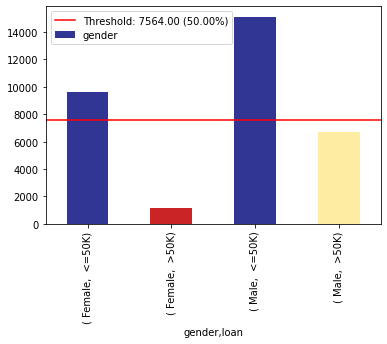

In [4]:
# show imbalance for multiple column
im = xai.imbalance_plot(df, "gender", "loan")

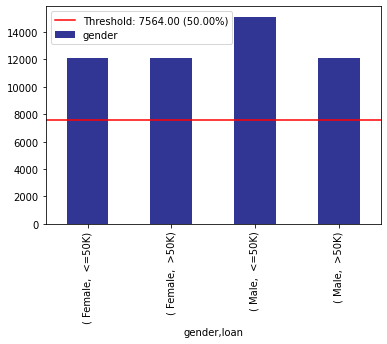

In [5]:
# Balance dataset by upsampling/downsampling, use downsample= to downsample
bal_df = xai.balance(df, "gender", "loan", upsample=0.8)

In [6]:
bal_df.shape

(51434, 13)

In [7]:
# Perform custom operations on group
groups = xai.group_by_columns(df, ["gender", "loan"])
for group, group_df in groups:    
    print(group) 
    print(group_df["loan"].head(), "\n")

       'relationship', 'ethnicity', 'gender', 'loan'],
      dtype='object'). If you see an error these are not correct, please provide them as a string array as: categorical_cols=['col1', 'col2', ...]


(' Female', ' <=50K')
4      <=50K
5      <=50K
6      <=50K
12     <=50K
21     <=50K
Name: loan, dtype: object 

(' Female', ' >50K')
8      >50K
19     >50K
52     >50K
67     >50K
84     >50K
Name: loan, dtype: object 

(' Male', ' <=50K')
0      <=50K
1      <=50K
2      <=50K
3      <=50K
13     <=50K
Name: loan, dtype: object 

(' Male', ' >50K')
7      >50K
9      >50K
10     >50K
11     >50K
14     >50K
Name: loan, dtype: object 



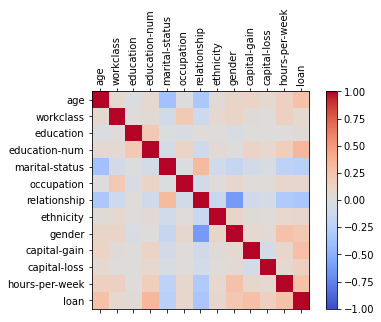

In [8]:
# visualize correlations as matrix
_ = xai.correlations(df, include_categorical=True, plot_type="matrix")

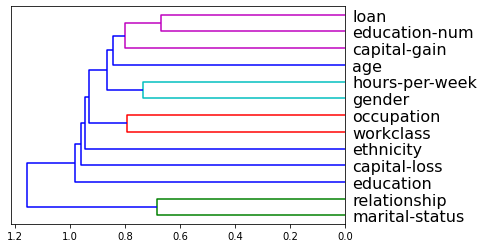

In [9]:
# visualize correlation as hierarhical dendogram
_ = xai.correlations(df, include_categorical=True)

In [10]:
# Balanced train-test split with minimum 300 examples of 
#     the cross of the target y and the column gender
x_train, y_train, x_test, y_test, train_idx, test_idx = \
    xai.balanced_train_test_split(
            x, y, "gender", 
            min_per_group=300,
            max_per_group=300,
            categorical_cols=categorical_cols)

x_train_display = bal_df[train_idx]
x_test_display = bal_df[test_idx]

print("Total number of examples: ", x_test.shape[0])

df_test = x_test_display.copy()
df_test["loan"] = y_test

_= xai.imbalance_plot(df_test, "gender", "loan", categorical_cols=categorical_cols)

NameError: ignored

In [11]:
model = build_model(proc_df.drop("loan", axis=1))

model.fit(f_in(x_train), y_train, epochs=50, batch_size=512)

probabilities = model.predict(f_in(x_test))
predictions = list((probabilities >= 0.5).astype(int).T[0])

NameError: ignored